<a href="https://colab.research.google.com/github/alierenc/di725-transformers-and-attention-based-deep-networks/blob/main/Assignment1/1.%20data_analysis_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

from google.colab import drive

drive.mount('/content/drive')

train_data_path = "/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 1/train.csv"
test_data_path = "/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 1/test.csv"

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

Mounted at /content/drive


In [3]:
train_df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [4]:
test_df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Shopping,Pricing and Discounts,Discounts through exchange offers,Pricing and Discounts -> Discounts through exc...,negative,Appliances,Hand Blender,less,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
1,Login and Account,Account Reactivation and Deactivation,Reactivating an inactive account,Account Reactivation and Deactivation -> React...,negative,Men/Women/Kids,Wrist Watch,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
2,Cancellations and returns,Cash on Delivery (CoD) Refunds,Refund timelines for Cash on Delivery returns,Cash on Delivery (CoD) Refunds -> Refund timel...,negative,Appliances,Induction Cooktop,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
3,Order,Order Delivery Issues,Package shows as delivered but cannot be found,Order Delivery Issues -> Package shows as deli...,negative,Men/Women/Kids,Sunglas,high,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
4,Cancellations and returns,Pickup and Shipping,Reimbursement of courier charges for return,Pickup and Shipping -> Reimbursement of courie...,negative,Electronics,Computer Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...


In [5]:
# Check the format of the conversation. It includes the sentences uttered by the customer and the agent in the order of conversation.
print(train_df['conversation'][0])

Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me check that for you. I'm sorry to inform you that we don't have this number on our records. Can you please confirm if this is the correct number?

Customer: Oh, I'm sorry. I might have registered with a different number. Can you please check with my email address instead? It's johndoe@email.com.

Agent: Sure, let me check that for you. (After a few moments) I see that we have your email address on our records. We'll be sending you a verification code shortly. Please check your email and let me know

In [6]:
# Info and summary
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   970 non-null    object
 1   issue_category               970 non-null    object
 2   issue_sub_category           970 non-null    object
 3   issue_category_sub_category  970 non-null    object
 4   customer_sentiment           970 non-null    object
 5   product_category             970 non-null    object
 6   product_sub_category         970 non-null    object
 7   issue_complexity             970 non-null    object
 8   agent_experience_level       970 non-null    object
 9   agent_experience_level_desc  970 non-null    object
 10  conversation                 970 non-null    object
dtypes: object(11)
memory usage: 83.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   30 non-null     object
 1   issue_category               30 non-null     object
 2   issue_sub_category           30 non-null     object
 3   issue_category_sub_category  30 non-null     object
 4   customer_sentiment           30 non-null     object
 5   product_category             30 non-null     object
 6   product_sub_category         30 non-null     object
 7   issue_complexity             30 non-null     object
 8   agent_experience_level       30 non-null     object
 9   agent_experience_level_desc  30 non-null     object
 10  conversation                 30 non-null     object
dtypes: object(11)
memory usage: 2.7+ KB


In [8]:
train_df.describe()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
count,970,970,970,970,970,970,970,970,970,970,970
unique,6,40,109,109,3,3,50,3,3,3,968
top,Cancellations and returns,Return and Exchange,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Bp Monitor,less,junior,"handles customer inquiries independently, poss...","Agent: You're welcome, Jane. Have a great day!"
freq,277,92,17,17,542,454,26,472,490,490,3


In [9]:
test_df.describe()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
count,30,30,30,30,30,30,30,30,30,30,30
unique,6,16,22,22,3,3,21,3,3,3,30
top,Order,Order Confirmation and Status,Confirming order status,Order Confirmation and Status -> Confirming or...,negative,Appliances,Vacuum Cleaner,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
freq,12,6,5,5,10,11,3,16,17,17,1


In [11]:
print("Missing values in train_df:")
display(train_df.isnull().sum())

Missing values in train_df:


,0
issue_area,0
issue_category,0
issue_sub_category,0
issue_category_sub_category,0
customer_sentiment,0
product_category,0
product_sub_category,0
issue_complexity,0
agent_experience_level,0
agent_experience_level_desc,0


In [12]:
print("Missing values in test_df:")
display(test_df.isnull().sum())

Missing values in test_df:


,0
issue_area,0
issue_category,0
issue_sub_category,0
issue_category_sub_category,0
customer_sentiment,0
product_category,0
product_sub_category,0
issue_complexity,0
agent_experience_level,0
agent_experience_level_desc,0


In [13]:
unique_rows = train_df.drop_duplicates()

print("Total rows:", len(train_df))
print("Unique rows:", len(unique_rows))

Total rows: 970
Unique rows: 970


customer_sentiment distribution in train data:


,count
customer_sentiment,
neutral,542
negative,411
positive,17


,proportion
customer_sentiment,
neutral,55.88
negative,42.37
positive,1.75


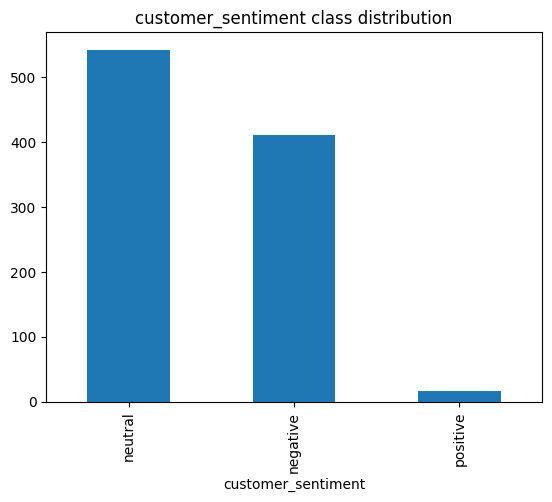

In [14]:
if 'customer_sentiment' in train_df.columns:
    print("customer_sentiment distribution in train data:")
    display(train_df['customer_sentiment'].value_counts())
    display((train_df['customer_sentiment'].value_counts(normalize=True) * 100).round(2)
)

    train_df['customer_sentiment'].value_counts().plot(kind='bar')
    plt.title("customer_sentiment class distribution")
    plt.show()


customer_sentiment distribution in test data:


,count
customer_sentiment,
negative,10
neutral,10
positive,10


,proportion
customer_sentiment,
negative,33.33
neutral,33.33
positive,33.33


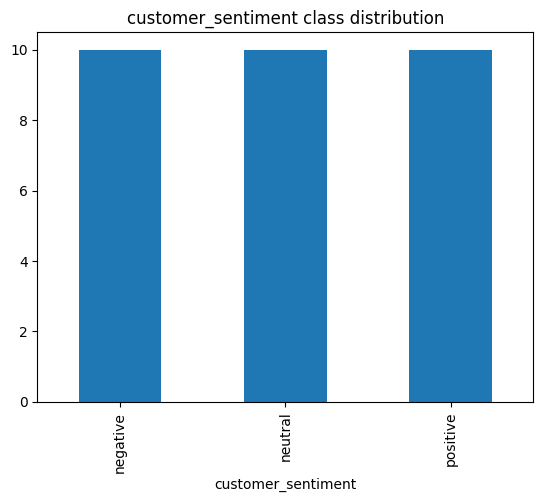

In [15]:
test_df['customer_sentiment'].value_counts()

if 'customer_sentiment' in test_df.columns:
    print("customer_sentiment distribution in test data:")
    display(test_df['customer_sentiment'].value_counts())
    display((test_df['customer_sentiment'].value_counts(normalize=True) * 100).round(2))

    test_df['customer_sentiment'].value_counts().plot(kind='bar')
    plt.title("customer_sentiment class distribution")
    plt.show()


In [16]:
# there are only 968 unique samples in train dataset. We will check the duplicates:
print("Duplicate conversations")
duplicates = train_df[train_df.duplicated(subset='conversation', keep=False)]
print(duplicates["conversation"])

Duplicate conversations
191    Agent: You're welcome, Jane. Have a great day!
286    Agent: You're welcome, Jane. Have a great day!
750    Agent: You're welcome, Jane. Have a great day!
Name: conversation, dtype: object


In [17]:
display(duplicates)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
191,Order,Order Delivery Issues,Package shows as delivered but cannot be found,Order Delivery Issues -> Package shows as deli...,negative,Men/Women/Kids,Shorts,less,junior,"handles customer inquiries independently, poss...","Agent: You're welcome, Jane. Have a great day!"
286,Order,Order Delivery Issues,Package shows as delivered but cannot be found,Order Delivery Issues -> Package shows as deli...,negative,Men/Women/Kids,T-Shirt,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: You're welcome, Jane. Have a great day!"
750,Order,Order Delivery Issues,Order approved but not shipped,Order Delivery Issues -> Order approved but no...,negative,Appliances,Sandwich Maker,less,experienced,"confidently handles complex customer issues, e...","Agent: You're welcome, Jane. Have a great day!"


Cramér's V between customer_sentiment and issue_area: 0.286


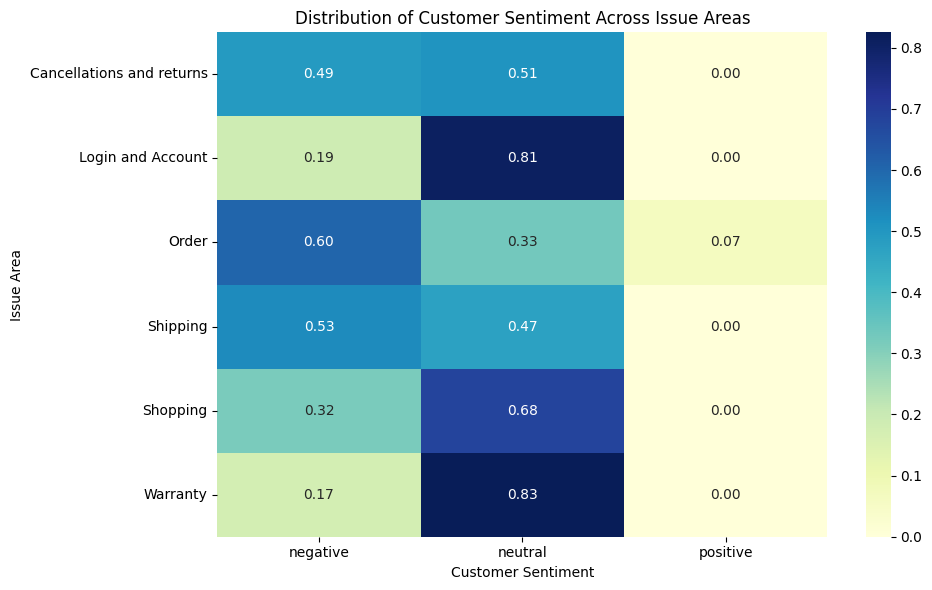

In [18]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V between customer_sentiment and issue_area
score = cramers_v(train_df['customer_sentiment'], train_df['issue_area'])
print(f"Cramér's V between customer_sentiment and issue_area: {score:.3f}")

crosstab = pd.crosstab(train_df['issue_area'], train_df['customer_sentiment'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Distribution of Customer Sentiment Across Issue Areas")
plt.ylabel("Issue Area")
plt.xlabel("Customer Sentiment")
plt.tight_layout()
plt.show()


Cramér's V between customer_sentiment and product_category: 0.039


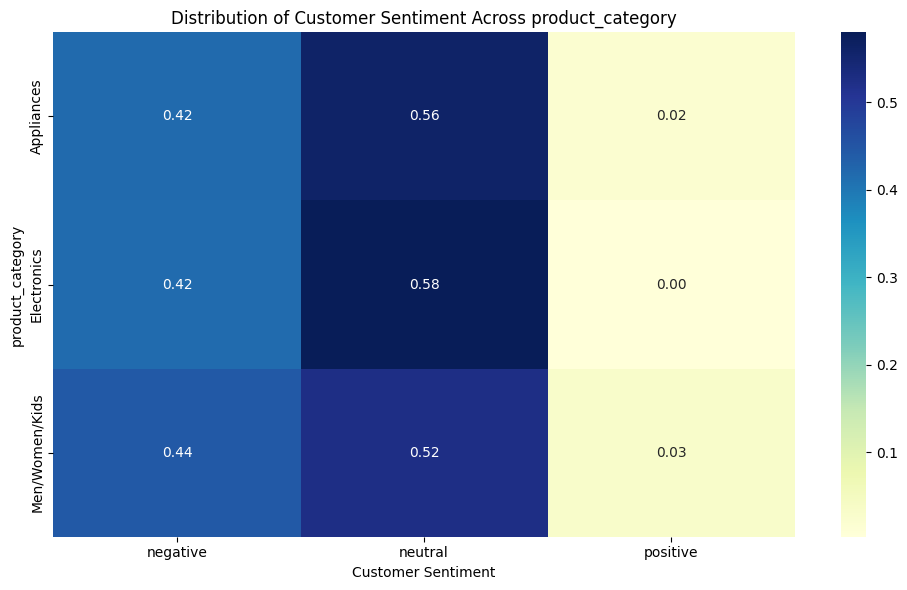

In [19]:
# Calculate Cramér's V between customer_sentiment and product_category
score = cramers_v(train_df['customer_sentiment'], train_df['product_category'])
print(f"Cramér's V between customer_sentiment and product_category: {score:.3f}")

crosstab = pd.crosstab(train_df['product_category'], train_df['customer_sentiment'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Distribution of Customer Sentiment Across product_category")
plt.ylabel("product_category")
plt.xlabel("Customer Sentiment")
plt.tight_layout()
plt.show()

Cramér's V between customer_sentiment and agent_experience_level: 0.052


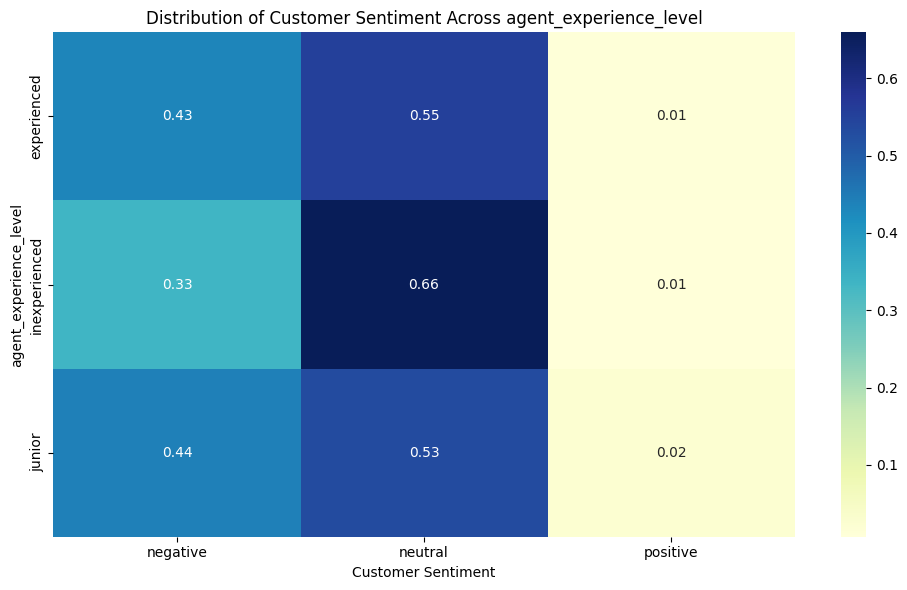

In [20]:
# Calculate Cramér's V between customer_sentiment and product_category
score = cramers_v(train_df['customer_sentiment'], train_df['agent_experience_level'])
print(f"Cramér's V between customer_sentiment and agent_experience_level: {score:.3f}")

crosstab = pd.crosstab(train_df['agent_experience_level'], train_df['customer_sentiment'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Distribution of Customer Sentiment Across agent_experience_level")
plt.ylabel("agent_experience_level")
plt.xlabel("Customer Sentiment")
plt.tight_layout()
plt.show()

In [21]:
columns = ['customer_sentiment', 'conversation']  # add more if needed
train_df_filtered = train_df[columns].copy()
test_df_filtered = test_df[columns].copy()

In [ ]:
print(train_df_filtered)

    customer_sentiment                                       conversation
0              neutral  Agent: Thank you for calling BrownBox Customer...
1              neutral  Agent: Thank you for calling BrownBox customer...
2              neutral  Agent: Thank you for calling BrownBox Customer...
3              neutral  Customer: Hi, I am facing an issue while loggi...
4             negative  Agent: Thank you for contacting BrownBox custo...
..                 ...                                                ...
965           negative  Agent: Thank you for calling BrownBox Customer...
966            neutral  Customer: Hi, I received an email from BrownBo...
967           negative  Agent: Thank you for calling BrownBox Customer...
968            neutral  Customer: Hi, I would like to check the status...
969           negative  Customer: Hi, I am calling because I have not ...

[970 rows x 2 columns]


In [22]:
from sklearn.model_selection import train_test_split

# Extract relevant columns for train and test DataFrames
final_train_df = train_df[["conversation", "customer_sentiment"]].copy()
final_test_df = test_df[["conversation", "customer_sentiment"]].copy()

# Splitting the training data into train and validation sets (80% for training, 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(
    final_train_df["conversation"],  # Features (conversations)
    final_train_df["customer_sentiment"],  # Target (customer sentiment)
    test_size=0.2,  # 20% for validation
    stratify=final_train_df["customer_sentiment"],  # Stratify to maintain label distribution
    random_state=725  # Ensure reproducibility
)

# Combine features and targets back into DataFrames
final_train_df = X_train.copy()
final_train_df = final_train_df.to_frame()  # Convert to DataFrame if needed
final_train_df["customer_sentiment"] = y_train

final_val_df = X_val.copy()
final_val_df = final_val_df.to_frame()  # Convert to DataFrame if needed
final_val_df["customer_sentiment"] = y_val

# Save the final DataFrames to CSV
final_train_df.to_csv("/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 1/train_data.csv")
final_val_df.to_csv("/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 1/validation_data.csv")
final_test_df.to_csv("/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 1/test_data.csv")